## Project UNIL_TUDOR

The first thing we do is to set the various parameters to start our project

In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# install Kaggle
! pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json


In [ ]:
! kaggle competitions download -c detecting-french-texts-difficulty-level-2023
from zipfile import ZipFile
with ZipFile('detecting-french-texts-difficulty-level-2023.zip','r') as zip:
  zip.extractall(path="")

  0% 0.00/303k [00:00<?, ?B/s]
100% 303k/303k [00:00<00:00, 28.3MB/s]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import  TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import spacy
from spacy import displacy
from sklearn.base import TransformerMixin
import seaborn as sns

We import the data from Kaggle

In [ ]:
df_training = pd.read_csv('training_data.csv')
df_test =pd.read_csv('unlabelled_test_data.csv', index_col = 'id')
df_sample = pd.read_csv('sample_submission.csv')

We use a vectorizer like TfidfVectorizer to convert texts into numerical vectors.

In [ ]:
tfidf_vector = TfidfVectorizer()

We assign the sentences from our dataset to X, and their corresponding difficulty levels to Y.

In [ ]:
X = df_training['sentence']
y = df_training['difficulty']

After doing our research on the internet, we found that the best train-test ratio is 80/20. Others also claim that 70/30 can also work, but we prefer the 80/20 ratio.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

##We have seen that methods such as KNN, Logistic Regression, Decision Tree or Random Forrest Tree are suggested. We'll first start with the KNN method.

## 1. KNN Model (K-Nearest Neigbors)

Develop a KNN (K-Nearest Neighbors) model by using a TFIDF (Term Frequency-Inverse Document Frequency) vectorization approach.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

knn_classifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto', metric='minkowski', p=2)

knn_pipeline = Pipeline([
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('knn_classifier', knn_classifier)
])

knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('knn_classifier', KNeighborsClassifier())])

As requested in the instructions, we display the Accuracy, Precision, Recall and F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicted_labels_knn = knn_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, predicted_labels_knn)
print("Accuracy:", accuracy)

precision = precision_score(y_test, predicted_labels_knn, average='macro')
print("Precision:", precision)

recall = recall_score(y_test, predicted_labels_knn, average='macro')
print("Recall:", recall)

f1 = f1_score(y_test, predicted_labels_knn, average='macro')
print("F1 Score:", f1)

Accuracy: 0.31875
Precision: 0.39261320062951693
Recall: 0.31508803435601235
F1 Score: 0.2942316023265181


#####And now we will see the confusion matrix of our model

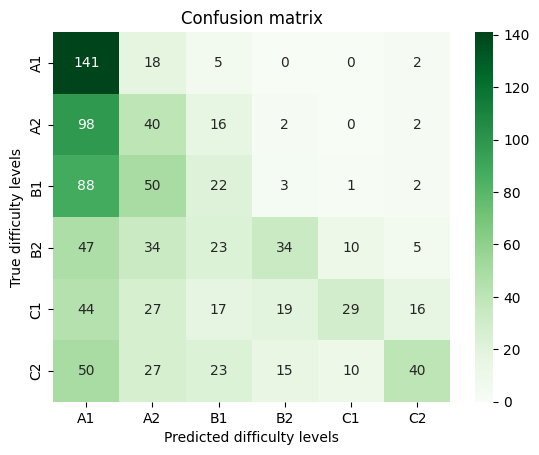

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predicted_labels_knn = knn_pipeline.predict(X_test)

conf_matrix = confusion_matrix(y_test, predicted_labels_knn)

difficulty_labels = ["A1", "A2", "B1", "B2", "C1", "C2"]

sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=difficulty_labels, yticklabels=difficulty_labels, cmap="Greens")
plt.xlabel('Predicted difficulty levels')
plt.ylabel('True difficulty levels')
plt.title('Confusion matrix')
plt.show()

In [ ]:
knn_pipeline.predict(X_test)

array(['A1', 'A1', 'C2', 'A2', 'A1', 'B1', 'A1', 'A2', 'A2', 'A1', 'B1',
       'A1', 'A2', 'A2', 'C2', 'B1', 'A2', 'C2', 'A1', 'A1', 'A1', 'A2',
       'A1', 'B2', 'A1', 'A1', 'A2', 'A1', 'C2', 'A1', 'A1', 'B2', 'A2',
       'B2', 'A1', 'B2', 'A2', 'A1', 'C1', 'A1', 'A1', 'A1', 'C2', 'A1',
       'A2', 'A2', 'A2', 'A1', 'B2', 'C1', 'A2', 'A1', 'B1', 'A2', 'B2',
       'A2', 'A1', 'B1', 'A1', 'B1', 'A1', 'C2', 'B1', 'A2', 'A1', 'C1',
       'C1', 'A2', 'A2', 'B1', 'C2', 'C2', 'A1', 'A2', 'A1', 'A2', 'A1',
       'A1', 'A1', 'A1', 'A2', 'A2', 'C1', 'C1', 'A1', 'A1', 'A1', 'A2',
       'A1', 'A1', 'A1', 'A1', 'A2', 'A1', 'A1', 'A2', 'A2', 'A1', 'A1',
       'B1', 'A1', 'C2', 'C2', 'A1', 'B1', 'A1', 'A2', 'B1', 'A1', 'B1',
       'B2', 'A2', 'A2', 'A1', 'A1', 'A1', 'C1', 'A2', 'A1', 'A1', 'A1',
       'A1', 'A2', 'C2', 'B1', 'A1', 'B2', 'B2', 'A1', 'A1', 'A1', 'B2',
       'A1', 'A1', 'A1', 'A2', 'A2', 'A1', 'A1', 'C2', 'A2', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A2', 'A1', 'A1', 'C2', 'A

In [ ]:
df_test['test_prediction']=knn_pipeline.predict(df_test['sentence'])

In [ ]:
df_sub_knn=df_test[['test_prediction']]
df_sub_knn.to_csv('submission.csv')

 Here, there are many methods for improving classification reports, but we've chosen the Hyperparameter optimization with GridSearchCV method because it will help us to find the best combination of parameters to improve model performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'n_neighbors': np.arange(1, 10),
    'p': np.arange(1, 3),
    'weights': ['uniform', 'distance']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=5, scoring='accuracy', n_jobs=-1)
pipeline_knn_grid_search = Pipeline([
    ('tfidf_vectorizer', tfidf_vector),
    ('knn_grid_search', knn_grid_search)
])

pipeline_knn_grid_search.fit(X_train, y_train)
print('Best parameters found:', knn_grid_search.best_params_)

Best parameters found: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


With the help of the Hyperparameter optimization, we'll try again to see if our results are more accurate.

In [ ]:
optimized_knn_classifier = KNeighborsClassifier(n_neighbors=3, p=2, weights='distance', algorithm='auto')
optimized_knn_pipeline = Pipeline([
    ('tfidf_vectorizer', tfidf_vector),
    ('knn_classifier', optimized_knn_classifier)
])

optimized_knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('knn_classifier',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])

We can see that the accuracy, precision, recall and f1 score are better than before.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

optimized_predicted_labels_knn = optimized_knn_pipeline.predict(X_test)

optimized_accuracy = accuracy_score(y_test, optimized_predicted_labels_knn)
print("Accuracy:", optimized_accuracy)

optimized_precision = precision_score(y_test, optimized_predicted_labels_knn, average='macro')
print("Precision:", optimized_precision)

optimized_recall = recall_score(y_test, optimized_predicted_labels_knn, average='macro')
print("Recall:", optimized_recall)

optimized_f1 = f1_score(y_test, optimized_predicted_labels_knn, average='macro')
print("F1 Score:", optimized_f1)

Accuracy: 0.35833333333333334
Precision: 0.4056602830741081
Recall: 0.3550439239754206
F1 Score: 0.3456783256180666


In [ ]:
df_test['test_prediction']=optimized_knn_pipeline.predict(df_test['sentence'])

In [ ]:
df_sub_optimized_knn=df_test[['test_prediction']]

In [ ]:
df_sub_optimized_knn.to_csv('submission.csv')

In [ ]:
! kaggle competitions submit -c detecting-french-texts-difficulty-level-2023 -f submission.csv -m "Sample submission"

100% 8.31k/8.31k [00:00<00:00, 13.2kB/s]
Successfully submitted to Detecting the difficulty level of French texts

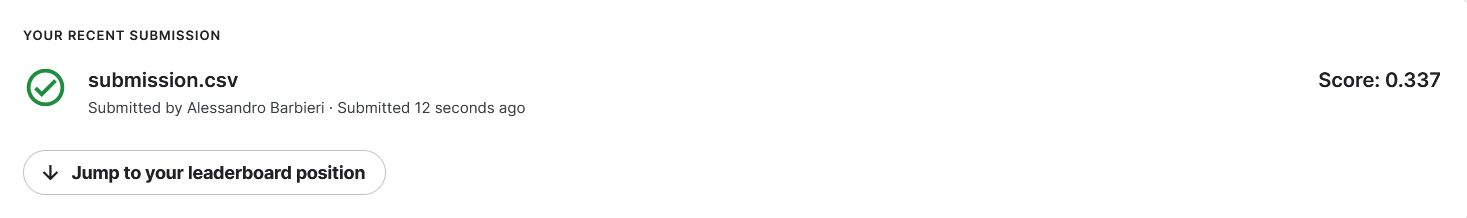

# 2. Decision Tree Classifier Model


Develop a Decision Tree Classifier Model by Using a TFIDF (Term Frequency-Inverse Document Frequency) vectorization approach.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

tfidf_vectorizer = TfidfVectorizer()

decision_tree_classifier = DecisionTreeClassifier(random_state=42)

decision_tree_pipeline = Pipeline([
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('decision_tree_classifier', decision_tree_classifier)
])

decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('decision_tree_classifier',
                 DecisionTreeClassifier(random_state=42))])

As requested in the instructions, we display the Accuracy, Precision, Recall and F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicted_labels_decision_tree = decision_tree_pipeline.predict(X_test)

accuracy_decision_tree = accuracy_score(y_test, predicted_labels_decision_tree)
print("Accuracy:", accuracy_decision_tree)

precision_decision_tree = precision_score(y_test, predicted_labels_decision_tree, average='macro')
print("Precision:", precision_decision_tree)

recall_decision_tree = recall_score(y_test, predicted_labels_decision_tree, average='macro')
print("Recall:", recall_decision_tree)

f1_decision_tree = f1_score(y_test, predicted_labels_decision_tree, average='macro')
print("F1 Score:", f1_decision_tree)

Accuracy: 0.29375
Precision: 0.2851492249551018
Recall: 0.2917421266801387
F1 Score: 0.28491687536869


#####And now we will see the confusion matrix of our model

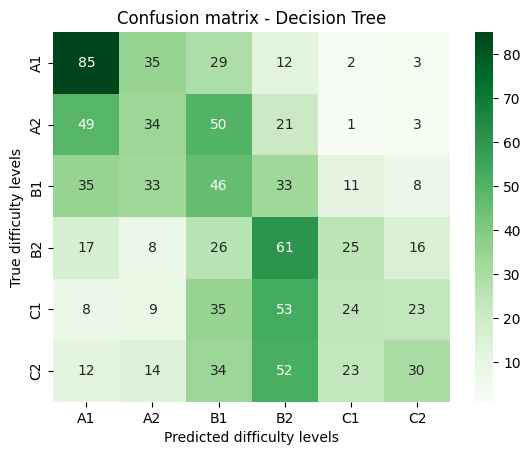

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predicted_labels_dt = decision_tree_pipeline.predict(X_test)

conf_matrix = confusion_matrix(y_test, predicted_labels_dt)

difficulty_labels = ["A1", "A2", "B1", "B2", "C1", "C2"]

sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=difficulty_labels, yticklabels=difficulty_labels, cmap="Greens")
plt.xlabel('Predicted difficulty levels')
plt.ylabel('True difficulty levels')
plt.title('Confusion matrix - Decision Tree')
plt.show()

We improve the model by using Hyperparameter optimization with GridSearchCV



In [ ]:
from sklearn.model_selection import GridSearchCV

depth_grid = {'max_depth': np.arange(5, 25)}
decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), depth_grid, cv=5)

decision_tree_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('grid_search', decision_tree_grid_search)
])

decision_tree_pipeline.fit(X_train, y_train)
predictions = decision_tree_pipeline.predict(X_test)

print("Best parameters found:", decision_tree_grid_search.best_params_)

Best parameters found: {'max_depth': 24}


With the help of the Hyperparameter optimization, we'll try again to see if our results are more accurate.

In [ ]:
optimized_decision_tree = DecisionTreeClassifier(max_depth=24, random_state=42)
optimized_decision_tree_pipeline = Pipeline([
    ('vectorizer', tfidf_vector),
    ('classifier', optimized_decision_tree)
])

optimized_decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=24, random_state=42))])

We can see that the Accuracy, Precision and Recall are better than before, except F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

optimised_predicted_labels_decision_tree = optimized_decision_tree_pipeline.predict(X_test)

optimised_accuracy_decision_tree = accuracy_score(y_test, optimised_predicted_labels_decision_tree)
print("Accuracy:", optimised_accuracy_decision_tree)

optimised_precision_decision_tree = precision_score(y_test, optimised_predicted_labels_decision_tree, average='weighted')
print("Precision:", optimised_precision_decision_tree)

optimised_recall_decision_tree = recall_score(y_test, optimised_predicted_labels_decision_tree, average='weighted')
print("Recall:", optimised_recall_decision_tree)

optimised_f1_decision_tree = f1_score(y_test, optimised_predicted_labels_decision_tree, average='weighted')
print("F1 Score:", optimised_f1_decision_tree)

Accuracy: 0.29270833333333335
Precision: 0.2915161880420319
Recall: 0.29270833333333335
F1 Score: 0.28386731092118034


In [ ]:
df_test['test_prediction']=optimized_decision_tree_pipeline.predict(df_test['sentence'])
df_sub_optimized_DT=df_test[['test_prediction']]

In [ ]:
df_sub_optimized_DT.to_csv('submission.csv')

In [ ]:
! kaggle competitions submit -c detecting-french-texts-difficulty-level-2023 -f submission.csv -m "Sample submission"

100% 8.31k/8.31k [00:00<00:00, 14.7kB/s]
Successfully submitted to Detecting the difficulty level of French texts

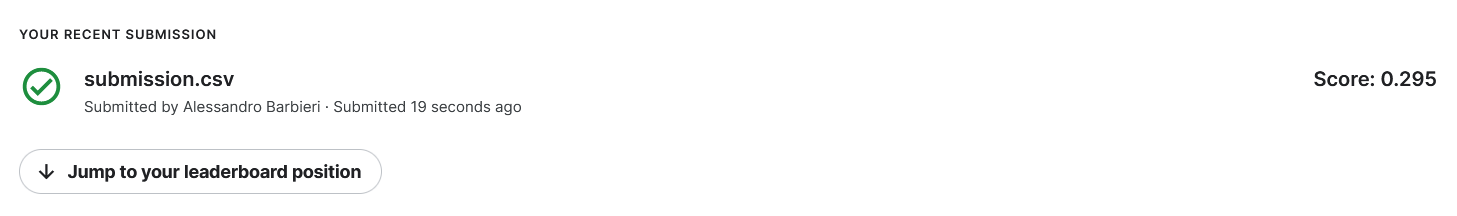

# 3. Random Forest Classifier Model


Develop a Random Forest Classifier Model by Using a TFIDF (Term Frequency-Inverse Document Frequency) vectorization approach.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

tfidf_vectorizer = TfidfVectorizer()

random_forest_classifier = RandomForestClassifier(random_state=42)

random_forest_pipeline = Pipeline([
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('random_forest_classifier', random_forest_classifier)
])

random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('random_forest_classifier',
                 RandomForestClassifier(random_state=42))])

As requested in the instructions, we display the Accuracy, Precision, Recall and F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicted_labels_random_forest = random_forest_pipeline.predict(X_test)

accuracy_random_forest = accuracy_score(y_test, predicted_labels_random_forest)
print("Accuracy:", accuracy_random_forest)

precision_random_forest = precision_score(y_test, predicted_labels_random_forest, average='macro')
print("Precision:", precision_random_forest)

recall_random_forest = recall_score(y_test, predicted_labels_random_forest, average='macro')
print("Recall:", recall_random_forest)

f1_random_forest = f1_score(y_test, predicted_labels_random_forest, average='macro')
print("F1 Score:", f1_random_forest)

Accuracy: 0.39166666666666666
Precision: 0.3954525630865336
Recall: 0.3893964269357935
F1 Score: 0.3765062658607538


#####And now we will see the confusion matrix of our model

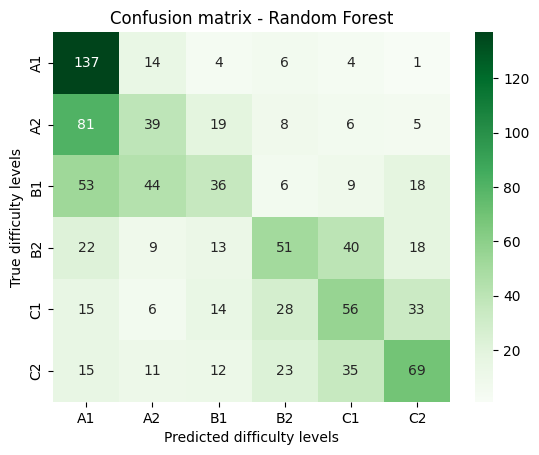

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predicted_labels_rf = random_forest_pipeline.predict(X_test)

conf_matrix_rf = confusion_matrix(y_test, predicted_labels_rf)

difficulty_labels = ["A1", "A2", "B1", "B2", "C1", "C2"]

sns.heatmap(conf_matrix_rf, annot=True, fmt='g', xticklabels=difficulty_labels, yticklabels=difficulty_labels, cmap="Greens")
plt.xlabel('Predicted difficulty levels')
plt.ylabel('True difficulty levels')
plt.title('Confusion matrix - Random Forest')
plt.show()

We improve the model by using Hyperparameter optimization with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': np.arange(5, 25),
    'n_estimators': [10, 50, 100, 200]
}

random_forest_grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

random_forest_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('grid_search', random_forest_grid_search)
])

random_forest_pipeline.fit(X_train, y_train)
predictions = random_forest_pipeline.predict(X_test)

print("Best parameters found:", random_forest_grid_search.best_params_)

Best parameters found: {'max_depth': 24, 'n_estimators': 200}


With the help of the Hyperparameter optimization, we'll try again to see if our results are more accurate.

In [ ]:
optimized_random_forest = RandomForestClassifier(max_depth=24, n_estimators=200, random_state=42)

optimized_random_forest_pipeline = Pipeline([
    ('vectorizer', tfidf_vector),
    ('classifier', optimized_random_forest)
])

optimized_random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 RandomForestClassifier(max_depth=24, n_estimators=200,
                                        random_state=42))])

We show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

optimised_predicted_labels_random_forest = optimized_random_forest_pipeline.predict(X_test)

optimised_accuracy_random_forest = accuracy_score(y_test, optimised_predicted_labels_random_forest)
print("Accuracy:", optimised_accuracy_random_forest)

optimised_precision_random_forest = precision_score(y_test, optimised_predicted_labels_random_forest, average='weighted')
print("Precision:", optimised_precision_random_forest)

optimised_recall_random_forest = recall_score(y_test, optimised_predicted_labels_random_forest, average='weighted')
print("Recall:", optimised_recall_random_forest)

optimised_f1_random_forest = f1_score(y_test, optimised_predicted_labels_random_forest, average='weighted')
print("F1 Score:", optimised_f1_random_forest)

Accuracy: 0.378125
Precision: 0.36803542026407765
Recall: 0.378125
F1 Score: 0.35644852771376256


In [ ]:
df_test['test_prediction'] = optimized_random_forest_pipeline.predict(df_test['sentence'])
df_sub_optimized_RF = df_test[['test_prediction']]

In [ ]:
df_sub_optimized_RF.to_csv('submission.csv')

In [ ]:
! kaggle competitions submit -c detecting-french-texts-difficulty-level-2023 -f submission.csv -m "Sample submission"

100% 8.31k/8.31k [00:00<00:00, 14.3kB/s]
Successfully submitted to Detecting the difficulty level of French texts

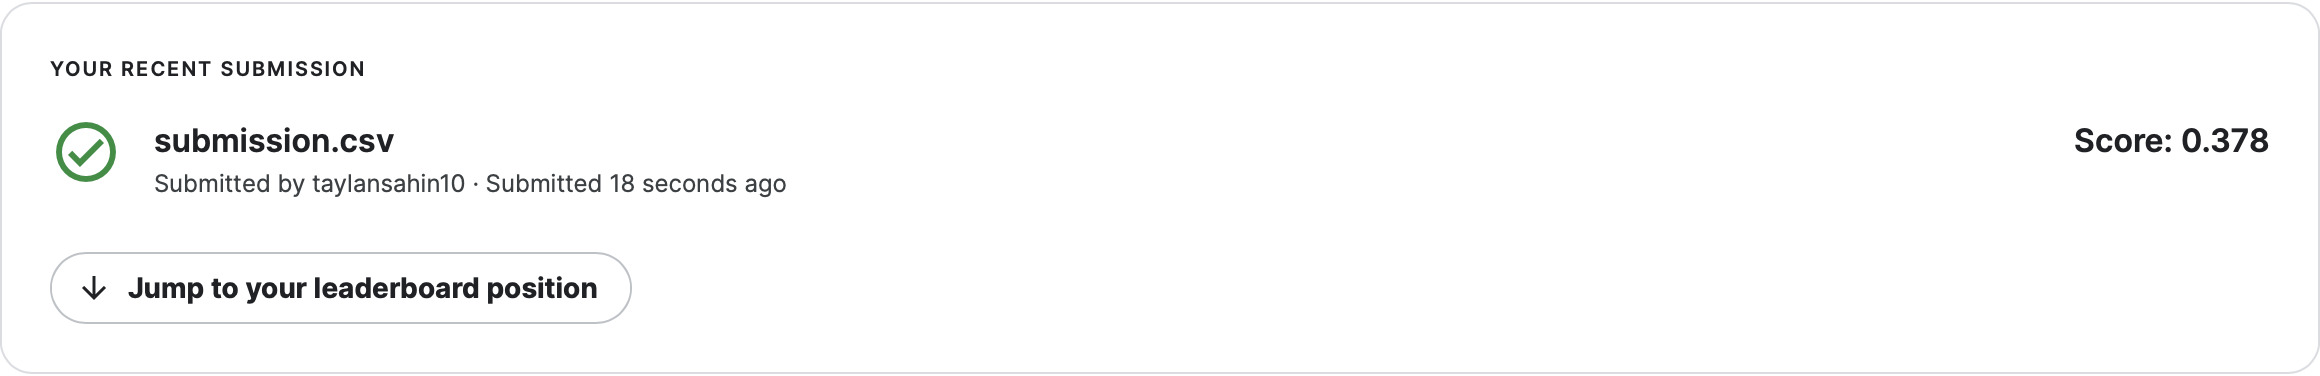